In [1]:
#import libraries
%matplotlib inline                   

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# this follows a procedure I found online in http://savvastjortjoglou.com/nba-draft-part01-scraping.html
url_dd = "https://www.pgatour.com/stats/stat.101.1980.html"
url_da = "https://www.pgatour.com/stats/stat.102.1980.html"
url_gir = "https://www.pgatour.com/stats/stat.103.1980.html"
url_putts = "https://www.pgatour.com/stats/stat.119.1980.html"
url_scoring = "https://www.pgatour.com/stats/stat.120.1980.html"

# this is the html from the given urls
html_dd = urlopen(url_dd)
html_da = urlopen(url_da)
html_gir = urlopen(url_gir)
html_putts = urlopen(url_putts)
html_scoring = urlopen(url_scoring)

In [3]:
soup_dd = BeautifulSoup(html_dd)
soup_da = BeautifulSoup(html_da)
soup_gir = BeautifulSoup(html_gir)
soup_putts = BeautifulSoup(html_putts)
soup_scoring = BeautifulSoup(html_scoring)

C:\Users\Chris\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Chris\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [4]:
column_headers_dd = [th.getText() for th in 
                  soup_dd.findAll('tr', limit=2)[1].findAll('th')]
column_headers_da = [th.getText() for th in 
                  soup_da.findAll('tr', limit=2)[1].findAll('th')]
column_headers_gir = [th.getText() for th in 
                  soup_gir.findAll('tr', limit=2)[1].findAll('th')]
column_headers_putts = [th.getText() for th in 
                  soup_putts.findAll('tr', limit=2)[1].findAll('th')]
column_headers_scoring = [th.getText() for th in 
                  soup_scoring.findAll('tr', limit=2)[1].findAll('th')]

In [5]:
data_rows_dd = soup_dd.findAll('tr')[2:] 
data_rows_da = soup_da.findAll('tr')[2:]         # skip the first 2 header rows
data_rows_gir = soup_gir.findAll('tr')[2:] 
data_rows_putts = soup_putts.findAll('tr')[2:]
data_rows_scoring = soup_scoring.findAll('tr')[2:] 

player_data_dd = [[td.getText() for td in data_rows_dd[i].findAll('td')]
            for i in range(len(data_rows_dd))]

player_data_da = [[td.getText() for td in data_rows_da[i].findAll('td')]
            for i in range(len(data_rows_da))]
player_data_gir = [[td.getText() for td in data_rows_gir[i].findAll('td')]
            for i in range(len(data_rows_gir))]
player_data_putts = [[td.getText() for td in data_rows_putts[i].findAll('td')]
            for i in range(len(data_rows_putts))]
player_data_scoring = [[td.getText() for td in data_rows_scoring[i].findAll('td')]
            for i in range(len(data_rows_scoring))]

In [6]:
df_dd = pd.DataFrame(player_data_dd, columns=column_headers_dd)   #create DataFrames
df_dd.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG.,TOTAL DISTANCE,TOTAL DRIVES
0,\n 1,\n,\nDan Pohl\n,96,274.3,"51,839",189
1,\n 2,\n,\nBuddy Gardner\n,108,272.9,"58,138",213
2,\n 3,\n,\nFuzzy Zoeller\n,80,271.5,"43,167",159
3,\n T4,\n,\nJoe Hager\n,73,270.4,"38,932",144
4,\n T4,\n,\nTommy Valentine\n,74,270.4,"39,745",147


In [7]:
df_dd.rename(columns={'AVG.':'AVG DRIVE DIST'},inplace=True)
df_dd = df_dd.drop(['RANK THIS WEEK','RANK LAST WEEK','TOTAL DISTANCE', 'TOTAL DRIVES'],axis=1)
df_dd.head()


,PLAYER NAME,ROUNDS,AVG DRIVE DIST
0,\nDan Pohl\n,96,274.3
1,\nBuddy Gardner\n,108,272.9
2,\nFuzzy Zoeller\n,80,271.5
3,\nJoe Hager\n,73,270.4
4,\nTommy Valentine\n,74,270.4


In [8]:
df_da = pd.DataFrame(player_data_da, columns=column_headers_da)   #create DataFrames
df_da.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,%,FAIRWAYS HIT,POSSIBLE FAIRWAYS
0,\n 1,\n,\nMike Reid\n,111,79.45,"1,187","1,494"
1,\n 2,\n,\nCalvin Peete\n,96,78.74,"1,063","1,350"
2,\n 3,\n,\nBill Rogers\n,98,77.92,"1,069","1,372"
3,\n 4,\n,\nJohn Mahaffey\n,89,75.68,943,"1,246"
4,\n 5,\n,\nHubert Green\n,85,74.70,886,"1,186"


In [9]:
df_da.rename(columns={'%':'PERCENT FAIRWAYS'},inplace=True)
df_da = df_da.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','FAIRWAYS HIT', 'POSSIBLE FAIRWAYS'],axis=1)

In [10]:
df_gir = pd.DataFrame(player_data_gir, columns=column_headers_gir)
df_gir.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,%,GREENS HIT,# HOLES,RELATIVE/PAR
0,\n 1,\n,\nJack Nicklaus\n,49,72.11,636,882,
1,\n 2,\n,\nMike Reid\n,111,71.60,"1,379","1,926",
2,\n 3,\n,\nCalvin Peete\n,96,70.85,"1,237","1,746",
3,\n 4,\n,\nJohn Mahaffey\n,89,70.79,"1,134","1,602",
4,\n 5,\n,\nCurtis Strange\n,114,70.47,"1,446","2,052",


In [11]:
df_gir.rename(columns={'%':'PERCENT GIR'},inplace=True)
df_gir = df_gir.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','GREENS HIT', '# HOLES', 'RELATIVE/PAR'],axis=1)

In [12]:
df_putts = pd.DataFrame(player_data_putts, columns=column_headers_putts)
df_putts.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG,TOTAL PUTTS,TOTAL ROUNDS,LOW TOTAL PUTTS
0,\n 1,\n,\nJerry Pate\n,95,28.81,"2,737",95,999
1,\n 2,\n,\nDave Hill\n,85,28.86,"2,453",85,999
2,\n T3,\n,\nGeorge Burns\n,106,28.93,"3,067",106,999
3,\n T3,\n,\nTom Watson\n,88,28.93,"2,546",88,999
4,\n T5,\n,\nJim Nelford\n,100,28.94,"2,894",100,999


In [13]:
df_putts.rename(columns={'AVG':'AVG PUTTS'},inplace=True)
df_putts = df_putts.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL PUTTS', 'TOTAL ROUNDS', 'LOW TOTAL PUTTS'],axis=1)

In [14]:
df_scoring = pd.DataFrame(player_data_scoring, columns=column_headers_scoring)
df_scoring.head()

,RANK THIS WEEK,RANK LAST WEEK,PLAYER NAME,ROUNDS,AVG,TOTAL STROKES,TOTAL ADJUSTMENT,TOTAL ROUNDS
0,\n 1,\n,\nLee Trevino\n,82,69.73,"5,718",,82
1,\n 2,\n,\nTom Watson\n,88,69.95,"6,156",,88
2,\n 3,\n,\nJerry Pate\n,95,70.72,"6,718",,95
3,\n 4,\n,\nAndy Bean\n,104,70.73,"7,356",,104
4,\n 5,\n,\nKeith Fergus\n,91,70.75,"6,438",,91


In [15]:
df_scoring.rename(columns={'AVG':'AVG SCORE'},inplace=True)
df_scoring = df_scoring.drop(['RANK THIS WEEK','RANK LAST WEEK','ROUNDS','TOTAL STROKES', 'TOTAL ADJUSTMENT', 'TOTAL ROUNDS'],axis=1)

In [16]:
for i in range(len(df_dd)):
    df_dd.iloc[i,0] = df_dd.iloc[i,0][1:-1]  
for i in range(len(df_da)):                       #Trying to fix the extracted player names to remove \n 
    df_da.iloc[i,0] = df_da.iloc[i,0][1:-1]
for i in range(len(df_gir)):
    df_gir.iloc[i,0] = df_gir.iloc[i,0][1:-1]
for i in range(len(df_putts)):
    df_putts.iloc[i,0] = df_putts.iloc[i,0][1:-1]
for i in range(len(df_scoring)):
    df_scoring.iloc[i,0] = df_scoring.iloc[i,0][1:-1]

In [17]:
dd_dict = df_dd.set_index('PLAYER NAME').T.to_dict()  #create a dictionary
dd_dict

{'Alan\xa0Tapie': {'AVG DRIVE DIST': '248.5', 'ROUNDS': '96'},
 'Allen\xa0Miller': {'AVG DRIVE DIST': '248.1', 'ROUNDS': '72'},
 'Al\xa0Geiberger': {'AVG DRIVE DIST': '244.4', 'ROUNDS': '55'},
 'Andy\xa0Bean': {'AVG DRIVE DIST': '264.9', 'ROUNDS': '104'},
 'Andy\xa0North': {'AVG DRIVE DIST': '263.5', 'ROUNDS': '81'},
 'Antonio\xa0Cerda': {'AVG DRIVE DIST': '249.9', 'ROUNDS': '56'},
 'Artie\xa0McNickle': {'AVG DRIVE DIST': '256.3', 'ROUNDS': '87'},
 'Barney\xa0Thompson': {'AVG DRIVE DIST': '268.2', 'ROUNDS': '54'},
 'Barry\xa0Jaeckel': {'AVG DRIVE DIST': '252.1', 'ROUNDS': '96'},
 'Beau\xa0Baugh': {'AVG DRIVE DIST': '263.0', 'ROUNDS': '62'},
 'Ben\xa0Crenshaw': {'AVG DRIVE DIST': '259.1', 'ROUNDS': '101'},
 'Billy\xa0Kratzert': {'AVG DRIVE DIST': '263.6', 'ROUNDS': '115'},
 'Bill\xa0Calfee': {'AVG DRIVE DIST': '266.0', 'ROUNDS': '90'},
 'Bill\xa0Rogers': {'AVG DRIVE DIST': '251.5', 'ROUNDS': '98'},
 'Bill\xa0Sander': {'AVG DRIVE DIST': '266.3', 'ROUNDS': '66'},
 'Bobby\xa0Cole': {'AVG D

In [18]:
da_dict = df_da.set_index('PLAYER NAME').T.to_dict()
gir_dict = df_gir.set_index('PLAYER NAME').T.to_dict()
putts_dict = df_putts.set_index('PLAYER NAME').T.to_dict()
scoring_dict = df_scoring.set_index('PLAYER NAME').T.to_dict()

In [19]:
for key in dd_dict:                                            #combine dictionaries together, works by player name
    dd_dict[key].update(da_dict[key])
    dd_dict[key].update(gir_dict[key])
    dd_dict[key].update(putts_dict[key])
    dd_dict[key].update(scoring_dict[key])

In [20]:
total_dict = dd_dict

In [21]:
df_total_1980 = pd.DataFrame(total_dict).T

In [22]:
df_total_1980

,AVG DRIVE DIST,AVG PUTTS,AVG SCORE,PERCENT FAIRWAYS,PERCENT GIR,ROUNDS
Alan Tapie,248.5,29.52,72.35,58.51,62.38,96
Allen Miller,248.1,30.36,73.01,65.70,64.12,72
Al Geiberger,244.4,31.04,73.45,67.53,63.03,55
Andy Bean,264.9,29.27,70.73,67.31,67.79,104
Andy North,263.5,29.09,71.65,58.87,64.65,81
Antonio Cerda,249.9,30.27,73.02,69.28,61.61,56
Artie McNickle,256.3,30.53,72.05,62.71,65.89,87
Barney Thompson,268.2,30.15,72.20,55.98,64.71,54
Barry Jaeckel,252.1,29.41,72.45,58.67,61.69,96
Beau Baugh,263.0,30.23,72.60,53.13,62.10,62


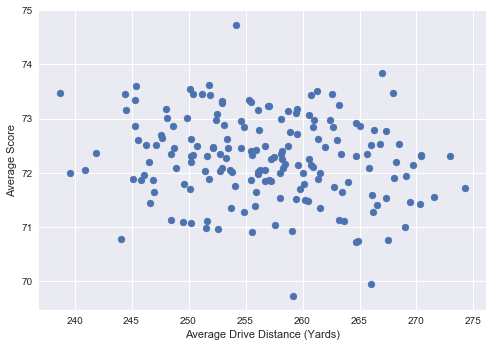

In [23]:
plt.scatter(df_total_1980['AVG DRIVE DIST'], df_total_1980['AVG SCORE']) 
plt.xlabel('Average Drive Distance (Yards)')
plt.ylabel('Average Score')
plt.show()

In [24]:
dd_array_1980 = np.array(df_total_1980['AVG DRIVE DIST']).astype(float)
score_array_1980 = np.array(df_total_1980['AVG SCORE']).astype(float)

In [25]:
pearson_dd = np.corrcoef(dd_array_1980,score_array_1980)[0][1]
pearson_dd


0.17524406619720495

In [26]:
corr_list = []
for _ in range(100000):
    perm = np.random.permutation(score_array_1980)
    corr_list.append(np.corrcoef(dd_array_1980,perm)[1][0])
corr_array = np.array(corr_list)
np.count_nonzero(corr_array<pearson_dd)/100000
np.count_nonzero(corr_array>-pearson_dd)/100000

0.00922

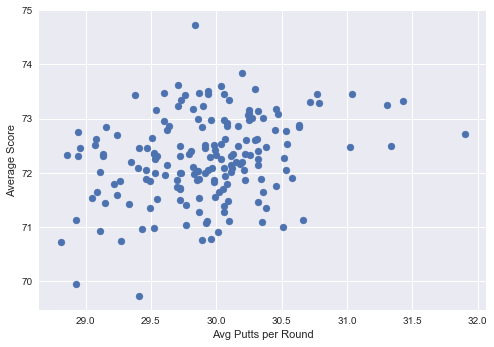

In [40]:
plt.scatter(df_total_1980['AVG PUTTS'], df_total_1980['AVG SCORE'])                  
plt.xlabel('Avg Putts per Round')
plt.ylabel('Average Score')
plt.show()  

In [41]:
putt_array_1980 = np.array(df_total_1980['AVG PUTTS']).astype(float)
np.corrcoef(putt_array_1980,score_array_1980)

array([[ 1.        ,  0.29072015],
       [ 0.29072015,  1.        ]])

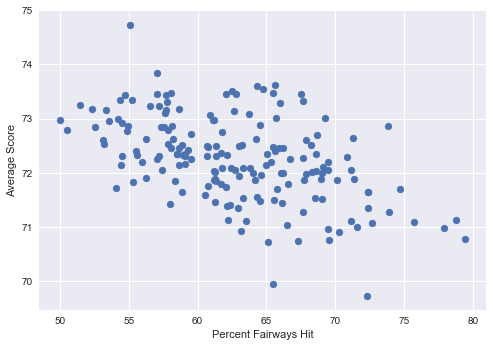

In [42]:
plt.scatter(df_total_1980['PERCENT FAIRWAYS'], df_total_1980['AVG SCORE'])
plt.xlabel('Percent Fairways Hit')
plt.ylabel('Average Score')
plt.show()

In [51]:
da_array_1980 = np.array(df_total_1980['PERCENT FAIRWAYS']).astype(float)
pearson_da = np.corrcoef(da_array_1980,score_array_1980)[1][0]
pearson_da

-0.50177507970475899

In [52]:
corr_list_2 = []
for _ in range(1000):
    perm_2 = np.random.permutation(score_array_1980)
    corr_list_2.append(np.corrcoef(da_array_1980,perm_2)[1][0])
corr_array_2 = np.array(corr_list_2)
np.count_nonzero(corr_array_2 < -0.50)

0

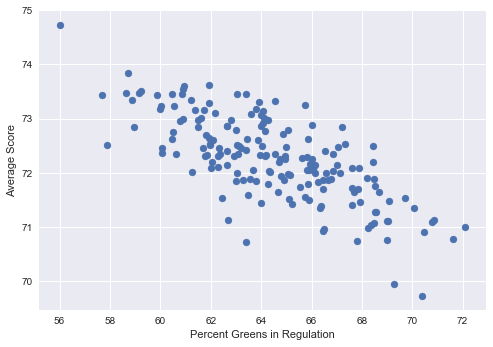

In [34]:
plt.scatter(df_total_1980['PERCENT GIR'], df_total_1980['AVG SCORE'])
plt.xlabel('Percent Greens in Regulation')
plt.ylabel('Average Score')
plt.show()

In [35]:
gir_array_1980 = np.array(df_total_1980['PERCENT GIR']).astype(float)
np.corrcoef(gir_array_1980,score_array_1980)

array([[ 1.       , -0.7370482],
       [-0.7370482,  1.       ]])